In [106]:
import pandas as pd
from functions import linear
import matplotlib.pyplot as plt
from mpl_style import lightbg
import numpy as np

In [107]:
df = pd.read_csv('table1.dat', sep=' ')
df

,ID,x,y,sig_y,sig_x,rho_xy
0,1,201,592,61,9,-0.84
1,2,244,401,25,4,0.31
2,3,47,583,38,11,0.64
3,4,287,402,15,7,-0.27
4,5,203,495,21,5,-0.33
5,6,58,173,15,9,0.67
6,7,210,479,27,4,-0.02
7,8,202,504,14,4,-0.05
8,9,198,510,30,11,-0.84
9,10,158,416,16,7,-0.69


Find best-fit line.

In [108]:
b, eb, m, em = linear(df['x'], df['y'], df['sig_y'])
x = np.linspace(0, 300)
y = m * x + b
y1 = (m + 1.96 * em) * x + (b - 1.96 * eb)
y2 = (m - 1.96 * em) * x + (b + 1.96 * eb)

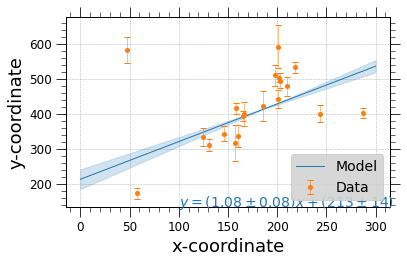

In [109]:
plt.style.use(lightbg)
fig, ax = plt.subplots()
ax.plot(x, y, label='Model', lw=1)
ax.fill_between(x, y1, y2, alpha=0.2, color='C0')
ax.errorbar(df['x'], df['y'], yerr=df['sig_y'], ls='none', marker='.', ms=8, zorder=3, label='Data', capsize=3, lw=0.5, color='C1')

#ax.set_xlim(50, 250)
#ax.set_ylim(100, 600)
ax.text(100, 135, fr'$y = ({m:.2f}\pm{em:.2f})x + ({b:.0f}\pm{eb:.0f})$', size=14, color='C0')
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
ax.legend(fontsize=14)
fig.tight_layout()
fig.savefig('exercise1.png')

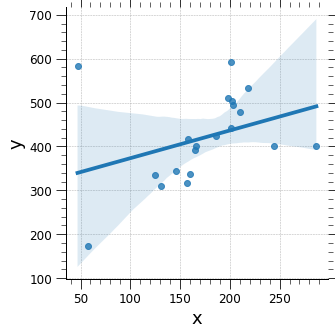

In [110]:
import seaborn as sns
sns.lmplot(x='x', y='y', data=df)

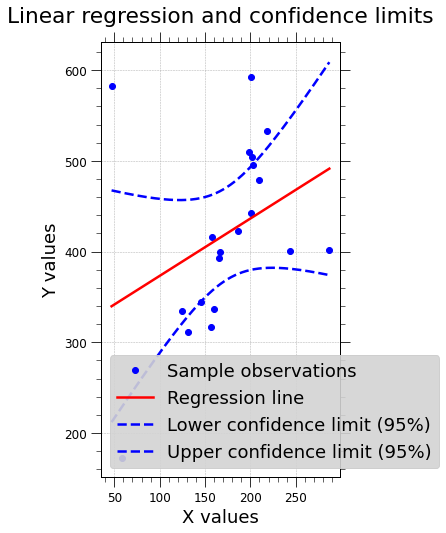

[127.71398936 126.86315031 126.01340644 125.16478006 124.31729407
 123.47097192 122.62583774 121.78191625 120.93923283 120.09781354
 119.25768516 118.41887514 117.5814117  116.74532383 115.91064129
 115.07739466 114.24561535 113.41533566 112.58658876 111.75940874
 110.93383066 110.10989055 109.28762546 108.46707349 107.64827379
 106.83126668 106.01609359 105.20279715 104.39142122 103.58201095
 102.77461276 101.96927445 101.16604523 100.36497572  99.56611805
  98.7695259   97.97525451  97.18336081  96.39390338  95.60694257
  94.82254055  94.04076134  93.26167091  92.4853372   91.71183022
  90.9412221   90.17358716  89.40900198  88.64754547  87.88929895
  87.13434621  86.38277363  85.6346702   84.89012763  84.14924044
  83.41210605  82.67882481  81.94950017  81.2242387   80.50315023
  79.7863479   79.07394826  78.3660714   77.66284097  76.96438435
  76.27083269  75.582321    74.89898829  74.22097759  73.54843609
  72.8815152   72.22037063  71.56516246  70.91605525  70.27321805
  69.63682

In [113]:
x = df['x']
y = df['y']

plt.figure(figsize=(20, 8))
# fit a curve to the data using a least squares 1st order polynomial fit
z = np.polyfit(x,y,1)
p = np.poly1d(z)
fit = p(x)
 
# get the coordinates for the fit curve
c_y = [np.min(fit),np.max(fit)]
c_x = [np.min(x),np.max(x)]
 
# predict y values of origional data using the fit
p_y = z[0] * x + z[1]
 
# calculate the y-error (residuals)
y_err = y - p_y
 
# create series of new test x-values to predict for
p_x = np.arange(np.min(x),np.max(x)+1,1)
 
# now calculate confidence intervals for new test x-series
mean_x = np.mean(x)         # mean of x
n = len(x)              # number of samples in origional fit
t = 2.31                # appropriate t value (where n=9, two tailed 95%)
s_err = np.sum(np.power(y_err,2))   # sum of the squares of the residuals
 
confs = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((p_x-mean_x),2)/
            ((np.sum(np.power(x,2)))-n*(np.power(mean_x,2))))))
 
# now predict y based on test x-values
p_y = z[0]*p_x+z[1]
 
# get lower and upper confidence limits based on predicted y and confidence intervals
lower = p_y - abs(confs)
upper = p_y + abs(confs)
 
# set-up the plot
plt.axes().set_aspect('equal')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear regression and confidence limits')
 
# plot sample data
plt.plot(x,y,'bo',label='Sample observations')
 
# plot line of best fit
plt.plot(c_x,c_y,'r-',label='Regression line')
 
# plot confidence limits
plt.plot(p_x,lower,'b--',label='Lower confidence limit (95%)')
plt.plot(p_x,upper,'b--',label='Upper confidence limit (95%)')
 
# configure legend
plt.legend(loc=0)
leg = plt.gca().get_legend()
 
# show the plot
plt.show()

print(confs)